In [2]:
!pwd

/home/ubuntu/Final-Project-Group2/Code/DataViz


In [3]:
data_path = '/home/ubuntu/Final-Project-Group2/Dataset'

In [4]:
print("DataSet File Structure:")
!ls -la {data_path}

DataSet File Structure:
total 88
drwxrwxr-x   4 ubuntu ubuntu  4096 Apr  9 18:39 .
drwxrwxr-x   8 ubuntu ubuntu  4096 Apr  9 20:27 ..
-rw-rw-r--   1 ubuntu ubuntu   119 Apr  9 18:02 sample_submission.csv
drwxrwxr-x   5 ubuntu ubuntu  4096 Apr  9 17:31 test
drwxrwxr-x 650 ubuntu ubuntu 28672 Apr  9 18:19 train
-rw-rw-r--   1 ubuntu ubuntu 38195 Apr  9 18:19 train_labels.csv


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


# Train labels analysis

In [6]:
train_labels = pd.read_csv(data_path + '/train_labels.csv')
train_labels.head(10)

,row_id,tomo_id,Motor axis 0,Motor axis 1,Motor axis 2,Array shape (axis 0),Array shape (axis 1),Array shape (axis 2),Voxel spacing,Number of motors
0,0,tomo_003acc,-1.0,-1.0,-1.0,500,1912,1847,6.5,0
1,1,tomo_00e047,169.0,546.0,603.0,300,959,928,15.6,1
2,2,tomo_00e463,235.0,403.0,137.0,500,924,956,19.7,6
3,3,tomo_00e463,243.0,363.0,153.0,500,924,956,19.7,6
4,4,tomo_00e463,222.0,379.0,144.0,500,924,956,19.7,6
5,5,tomo_00e463,225.0,262.0,628.0,500,924,956,19.7,6
6,6,tomo_00e463,225.0,241.0,643.0,500,924,956,19.7,6
7,7,tomo_00e463,231.0,289.0,632.0,500,924,956,19.7,6
8,8,tomo_01a877,147.0,638.0,286.0,300,960,928,13.1,1
9,9,tomo_02862f,101.0,351.0,120.0,300,959,928,15.6,1


### train_labels.csv: Training data labels. Each row represents a unique motor location and not a unique tomogram.

- `row_id` : index of the row
- `tomo_id` : unique identifier of the tomogram. Some tomograms in the train set have multiple motors.
- `Motor axis 0` : the z-coordinate of the motor, i.e., which slice it is located on
- `Motor axis 1` : the y-coordinate of the motor
- `Motor axis 2` : the x-coordinate of the motor
- `Array shape axis 0` : z-axis length, i.e., number of slices in the tomogram
- `Array shape axis 1` : y-axis length, or height of each slice
- `Array shape axis 2` : x-axis length, or width of each slice
- `Voxel spacing` : scaling of the tomogram; angstroms per voxel
- `Number of motors` : Number of motors in the tomogram. Note that each row represents a motor, so tomograms with multiple motors will have several rows to locate each motor.

In [7]:
print("Shape of train_labels:")
print(train_labels.shape)

Shape of train_labels:
(737, 10)


In [8]:
print("# of Missing values in each column: ")
print(train_labels.isnull().sum())

# of Missing values in each column: 
row_id                  0
tomo_id                 0
Motor axis 0            0
Motor axis 1            0
Motor axis 2            0
Array shape (axis 0)    0
Array shape (axis 1)    0
Array shape (axis 2)    0
Voxel spacing           0
Number of motors        0
dtype: int64


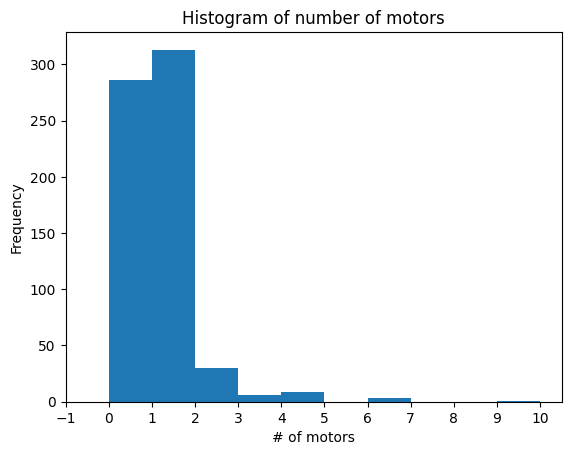

In [9]:
plt.hist(train_labels.drop_duplicates(subset='tomo_id')["Number of motors"])
plt.xticks(range(-1,11))
plt.xlabel("# of motors")
plt.ylabel("Frequency")
plt.title("Histogram of number of motors")
plt.show()

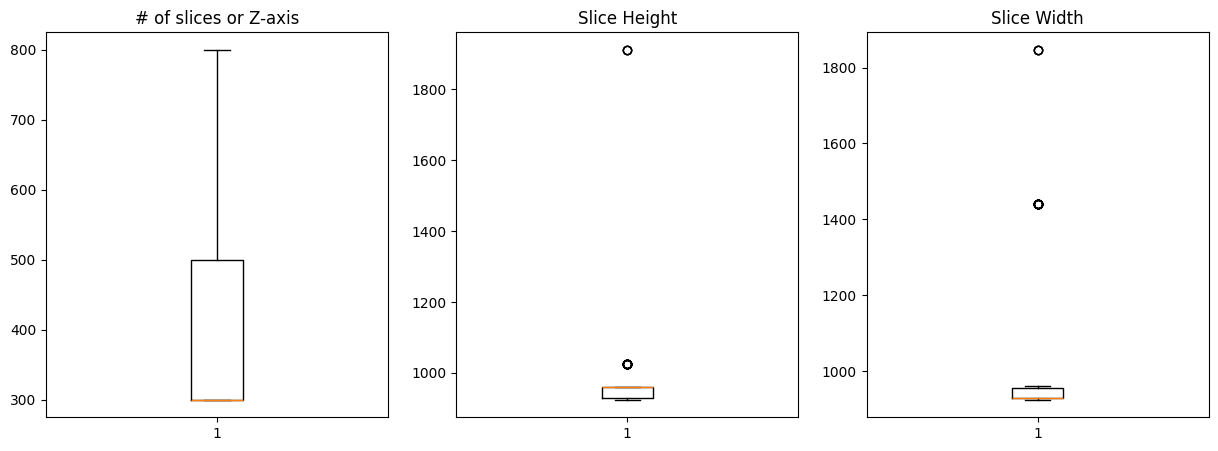

In [10]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].boxplot(train_labels["Array shape (axis 0)"])
ax[0].set_title("# of slices or Z-axis")

ax[1].boxplot(train_labels["Array shape (axis 1)"])
ax[1].set_title("Slice Height")

ax[2].boxplot(train_labels["Array shape (axis 2)"])
ax[2].set_title("Slice Width")
plt.show()

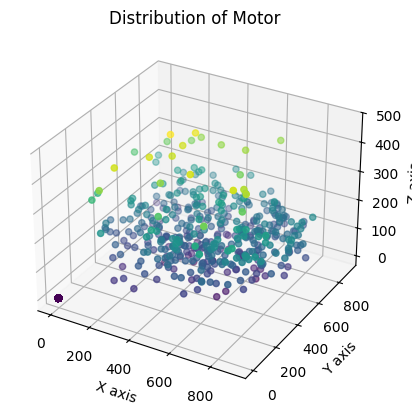

In [11]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_labels["Motor axis 2"], train_labels["Motor axis 1"], train_labels["Motor axis 0"], c=train_labels["Motor axis 0"], cmap='viridis')
plt.title("Distribution of Motor")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.ion()
plt.show()

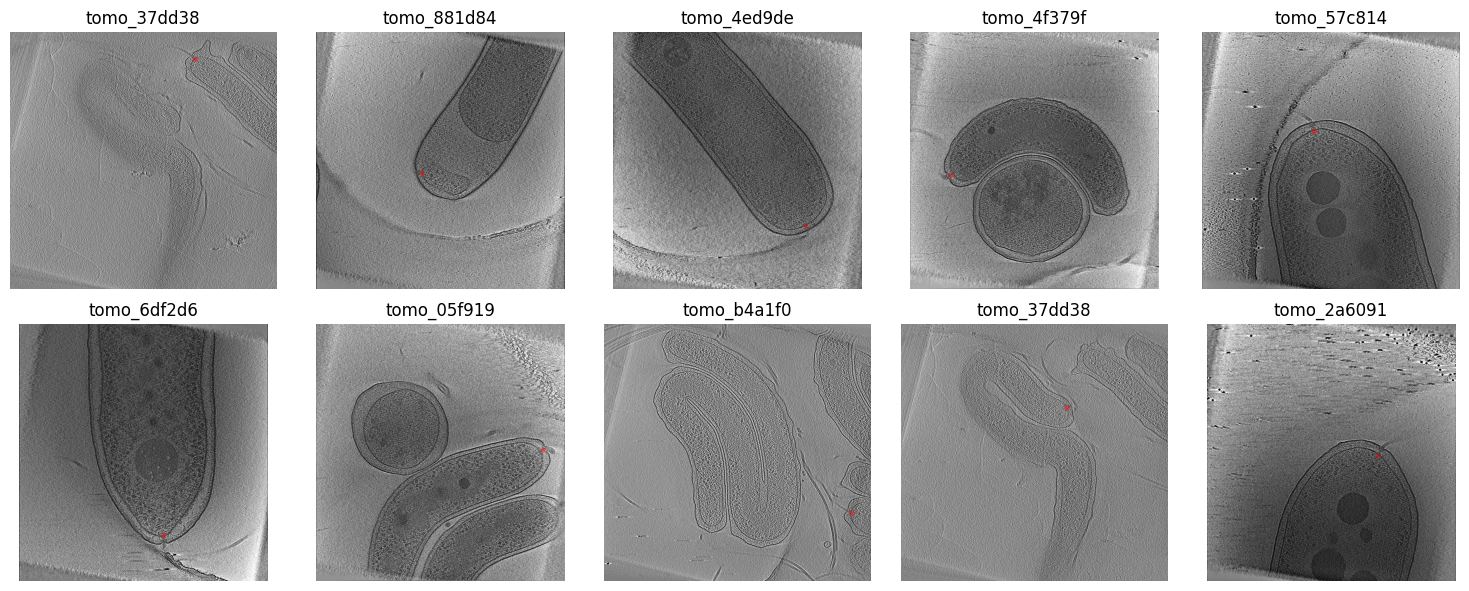

In [19]:
import random
random_sample_df = train_labels[train_labels["Motor axis 0"]!= -1].sample(n=10)

fig, axes = plt.subplots(2,5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    random_sample = random_sample_df.iloc[i]
    img_pth = data_path+"/train/"+random_sample["tomo_id"]+"/slice_"+str(int(random_sample["Motor axis 0"])).zfill(4)+".jpg"
    img = cv2.imread(img_pth)
    all_motors = train_labels[(train_labels["tomo_id"] == random_sample["tomo_id"]) &  (train_labels["Motor axis 0"] ==random_sample["Motor axis 0"])]
    overlay = img.copy()
    for _, motor in all_motors.iterrows():
        point_position = (int(motor["Motor axis 2"]), int(motor["Motor axis 1"]))
        point_color = (0, 0, 255)
        radius = 10
        alpha = 0.4
        overlay = img.copy()
        cv2.circle(overlay, point_position, radius, point_color, -1)
        img = cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0)

    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(image_rgb)
    ax.set_title(random_sample["tomo_id"], loc='center')
    ax.axis('off')
plt.tight_layout()
plt.show()
